Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.


In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
transactions=pd.read_csv('transaction_data.csv')

In [5]:
transactions.shape

(5315, 3)

In [6]:
transactions.dtypes

date           object
name           object
transaction    object
dtype: object

In [7]:
transactions.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [8]:
transactions.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.


In [9]:
transactions.transaction

0         cancelled
1       successfull
2       successfull
3         cancelled
4         cancelled
           ...     
5310    successfull
5311    successfull
5312    successfull
5313    successfull
5314      cancelled
Name: transaction, Length: 5315, dtype: object

In [10]:
transactions.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

<AxesSubplot: xlabel='transaction', ylabel='count'>

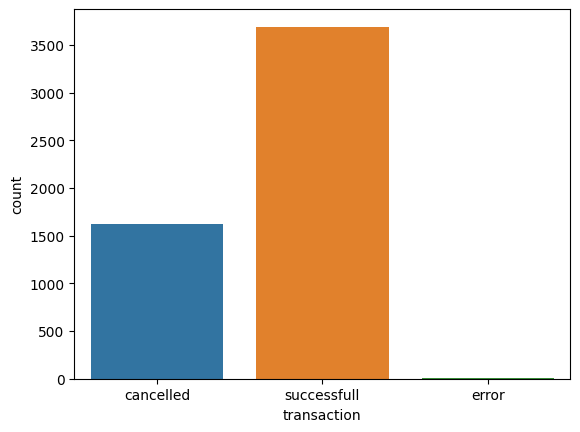

In [11]:

sns.countplot(transactions,x='transaction')

Сколько транзакций завершились ошибкой?

In [12]:
transactions.query('transaction=="error"').shape[0]

4

Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

In [13]:
successfull_operations=transactions.query('transaction=="successfull"')\
            .groupby('name', as_index=False).size()\
            .rename(columns={'size':'successfull_operations'})

<AxesSubplot: ylabel='Count'>

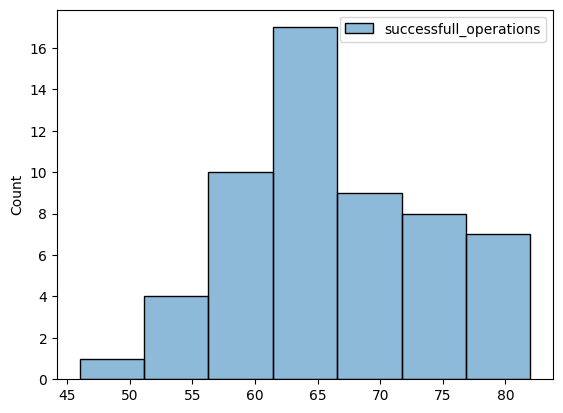

In [14]:
sns.histplot(data=successfull_operations)

Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)
Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.


In [30]:
new_transactions=pd.read_csv('transaction_data_updated.csv')

In [16]:
new_transactions.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [17]:
transactions_minutes=new_transactions\
    .groupby(['name','minute'],as_index=False)\
    .agg({'transaction':'count'})

In [18]:
transactions_minutes

,name,minute,transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [19]:
tr_piv=transactions_minutes.pivot(index='minute',columns='name',values='transaction')

<AxesSubplot: xlabel='minute'>

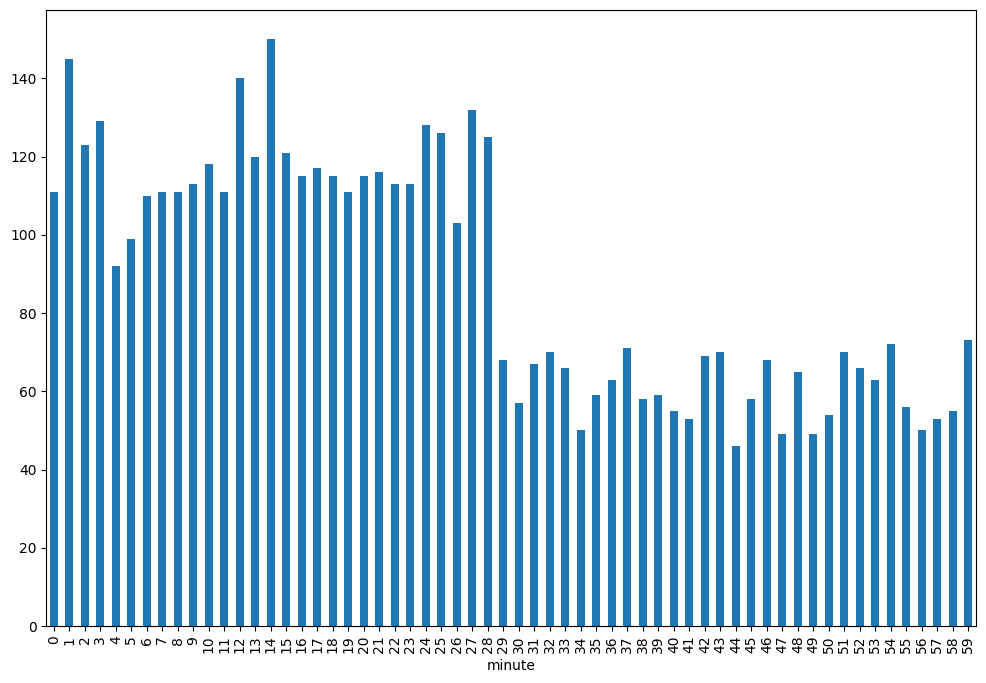

In [23]:
tr_piv.sum(axis=1).plot.bar(figsize=(12,8))

In [24]:
new_transactions

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [31]:
new_transactions.date=pd.to_datetime(new_transactions.date)

In [33]:
new_transactions.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [36]:
new_transactions['t_t']=new_transactions.date.dt.minute+new_transactions.date.dt.hour*60

<AxesSubplot: xlabel='t_t', ylabel='count'>

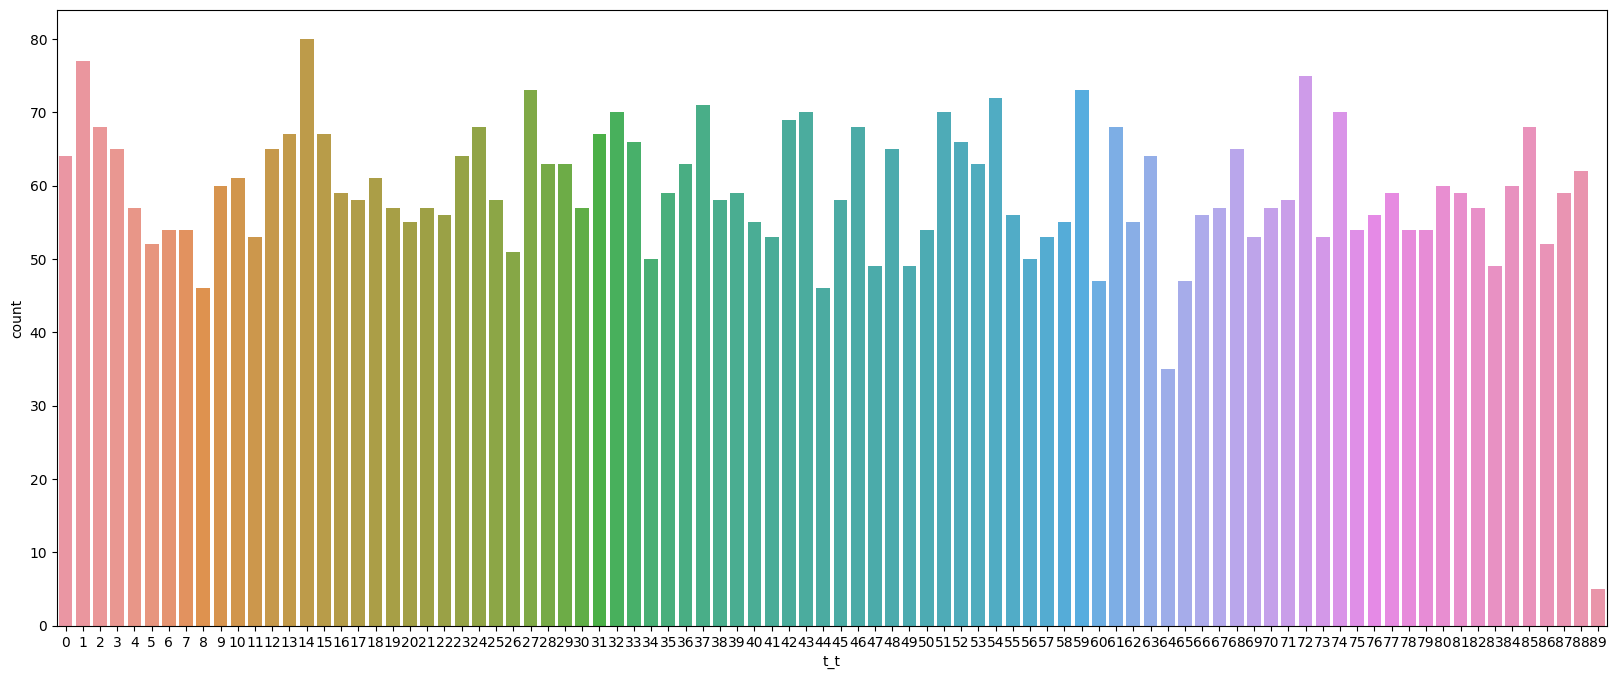

In [48]:
plt.figure(figsize=(20,8))
sns.countplot(new_transactions,x='t_t')